### Previsão de Cheias
Aluno: Vinícius Marzall Lippel

Primeiramente importamos as bibliotecas que serão necessárias para realizarmos a análise e previsão:

In [19]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 

In [3]:
txt_file_names = {
    'chuva-taio':'83050000TAIÓ_2962005-1442014-chuva',
    'nivel-taio':'83050000TAIÓ_2962005-1442014-nível',
    'chuva-ituporanga':'83250000ITUPORANGA_3172005-1442014-chuva',
    'nivel-ituporanga':'83250000ITUPORANGA_2962005-1032014-nível',
    'chuva-rio_do_sul':'83300200RIODOSUL-NOVO_2862005-1442014-Chuva',
    'nivel-rio_do_sul':'83300200RIODOSUL-NOVO_2982005-1422014 -nível'
}

Transformamos os arquivos .txt em .csv. É possível criar um pandas dataframe diretametente de um arquivo txt, no entanto desta maneira é mais fácil separarmos hora e data, além de ja deixarmos os dados organizados em arquivos csv, facilitando próximos projetos.

In [4]:
for csv_name, txt_name in txt_file_names.items():
    with open(f'txt/{txt_name}.txt', 'r') as in_file:
        next(in_file)
        stripped = (line.strip() for line in in_file)
        lines = (line.split() for line in stripped if line)
        with open(f'csv/{csv_name}.csv', 'w') as out_file:
            writer = csv.writer(out_file)
            if 'chuva' in csv_name:
                writer.writerow(('data', 'hora', 'chuva (mm)'))
            elif 'nivel' in csv_name:
                writer.writerow(('data', 'hora', 'nivel (cm)'))
            writer.writerows(lines)

Criamos então um dataframe para cada arquivo

In [5]:
chuva_taio = pd.read_csv('csv/chuva-taio.csv')
nivel_taio = pd.read_csv('csv/nivel-taio.csv')
chuva_ituporanga = pd.read_csv('csv/chuva-ituporanga.csv')
nivel_ituporanga = pd.read_csv('csv/nivel-ituporanga.csv')
chuva_rio_do_sul = pd.read_csv('csv/chuva-rio_do_sul.csv')
nivel_rio_do_sul = pd.read_csv('csv/nivel-rio_do_sul.csv')

Podemos ver que temos vários dados nulos

In [6]:
chuva_taio.head()

,data,hora,chuva (mm)
0,29/06/2005,00:00:00,NaN
1,29/06/2005,01:00:00,NaN
2,29/06/2005,02:00:00,NaN
3,29/06/2005,03:00:00,NaN
4,29/06/2005,04:00:00,NaN


In [7]:
chuva_ituporanga.head()

,data,hora,chuva (mm)
0,31/07/2005,01:00:00,NaN
1,31/07/2005,02:00:00,NaN
2,31/07/2005,03:00:00,NaN
3,31/07/2005,04:00:00,NaN
4,31/07/2005,05:00:00,NaN


Ao invés de tratarmos os dados separadamente, juntaremos os dados em um único dataframe. Para tal daremos um merge em todos os dataframes utilizando como base a data e hora. Caso um dos dataframes não possua a linha para dada data e hora, a linha equivalente nos outros dataframes também não serão adicionadas, já trantando problemas de incompatibilidade. Após juntarmos todas as tabelas, utilizamos a função dropna() para eliminarmos todas as linhas que contenham pelo menos um valor nulo.

In [8]:
data_frames = [chuva_taio, nivel_taio, chuva_ituporanga, nivel_ituporanga, chuva_rio_do_sul, nivel_rio_do_sul]
df = reduce(lambda  left,right: pd.merge(left,right,on=['data','hora'], how='outer'), data_frames)
# As colunas seguem a mesma ordem que passamos em data_frames
df.columns = ['data', 'hora', 'chuva-taio', 'nivel-taio', 'chuva-ituporanga', 'nivel-ituporanga', 'chuva-rio_do_sul', 'nivel-rio_do_sul']

# Removendo linhas com colunas nulas
df = df.dropna()

df.head(10)

,data,hora,chuva-taio,nivel-taio,chuva-ituporanga,nivel-ituporanga,chuva-rio_do_sul,nivel-rio_do_sul
678,31/07/2005,21:00:00,0.0,98.0,3.0,30.0,0.0,171.0
679,31/07/2005,22:00:00,0.0,98.0,12.0,39.0,0.0,171.0
680,31/07/2005,23:00:00,0.0,97.0,19.0,59.0,0.0,171.0
681,01/08/2005,00:00:00,0.0,97.0,5.0,82.0,0.0,170.0
684,01/08/2005,03:00:00,0.0,97.0,1.0,27.0,0.0,170.0
686,01/08/2005,05:00:00,0.0,97.0,1.0,27.0,0.0,169.0
688,01/08/2005,07:00:00,0.0,96.0,1.0,27.0,0.0,169.0
689,01/08/2005,08:00:00,0.0,96.0,2.0,30.0,0.0,168.0
690,01/08/2005,09:00:00,0.0,96.0,12.0,39.0,0.0,169.0
691,01/08/2005,10:00:00,0.0,95.0,19.0,59.0,0.0,168.0


Podemos utilizar a função describe() para obtermos mais informações sobre o dataframe gerado.

In [9]:
df.describe()

,chuva-taio,nivel-taio,chuva-ituporanga,nivel-ituporanga,chuva-rio_do_sul,nivel-rio_do_sul
count,66957.000000,66957.000000,66957.000000,66957.000000,66957.000000,66957.000000
mean,0.041549,180.214735,0.053664,61.800499,0.055229,208.492316
std,0.475469,152.568151,0.758685,40.230845,0.543762,127.192194
min,0.000000,44.000000,0.000000,8.000000,0.000000,91.000000
25%,0.000000,83.000000,0.000000,37.000000,0.000000,127.000000
50%,0.000000,121.000000,0.000000,49.000000,0.000000,165.000000
75%,0.000000,210.000000,0.000000,70.000000,0.000000,239.000000
max,48.000000,975.000000,140.600000,512.000000,38.000000,1183.000000


Através do método info() conseguimos garantir que não há valores nulos em nossa tabela e verificar os tipos dos dados de cada tabela. Utilizaremos apenas os dados de tipo numérico para realizarmos a previsão.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66957 entries, 678 to 130439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data              66957 non-null  object 
 1   hora              66957 non-null  object 
 2   chuva-taio        66957 non-null  float64
 3   nivel-taio        66957 non-null  float64
 4   chuva-ituporanga  66957 non-null  float64
 5   nivel-ituporanga  66957 non-null  float64
 6   chuva-rio_do_sul  66957 non-null  float64
 7   nivel-rio_do_sul  66957 non-null  float64
dtypes: float64(6), object(2)
memory usage: 4.6+ MB


Utilizamos o método corr() para vizualizar a correlação entre as colunas do dataframe. Podemos ver que as colunas com maior relação com o nível do rio em Rio do Sul são o nível em Taió e Ituporanga.

In [11]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,chuva-taio,nivel-taio,chuva-ituporanga,nivel-ituporanga,chuva-rio_do_sul,nivel-rio_do_sul
chuva-taio,1.00,0.01,0.14,0.01,0.19,-0.00
nivel-taio,0.01,1.00,0.02,0.81,0.04,0.95
chuva-ituporanga,0.14,0.02,1.00,0.04,0.24,0.02
nivel-ituporanga,0.01,0.81,0.04,1.00,0.05,0.89
chuva-rio_do_sul,0.19,0.04,0.24,0.05,1.00,0.04
nivel-rio_do_sul,-0.00,0.95,0.02,0.89,0.04,1.00


#### Etapa 2 - Previsão:

Primeiramente separamos as colunas nos dataframes x e y, onde x conterá colunas do utilizadas para realizar a previsão e y a coluna que será prevista. Depois separamos os dados em dados de teste e de treino, utilizando a função train_test_split() presente no SciKitLearn. Os dados de treino serão utilizados para treinar o algoritmo de previsão, e os de teste para testar a precisão da previsão dos dados.  

In [12]:
x = df[['chuva-taio', 'nivel-taio', 'chuva-ituporanga', 'nivel-ituporanga', 'chuva-rio_do_sul']]
y = df[['nivel-rio_do_sul']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2)

Instanciamos a classe LinearRegression do SciKitLearn e passamos os dados em X e Y de treino para ela.

In [13]:
multiple_reg = LinearRegression()
multiple_reg.fit(x_train, y_train)

LinearRegression()

Utilizamos então os dados de x_test para tentar prever seus respectivos y.

In [14]:
y_prediction = multiple_reg.predict(x_test)

Comparando os dados de y reais com os obtidos na previsão, temos um R^2 ajustado de 0.94.

In [15]:
adj_r2 = (1 - ((1 - r2_score(y_test, y_prediction)) * (len(y_test) - 1)) / 
          (len(y_test) - x_train.shape[1] - 1))
print(adj_r2)

0.937003225867312


Obervando os coeficientes podemos ver que a variável com maior impacto positivo é o nível do rio em Ituporanga, e a com maior impacto negativo é a quantidade de chuva em Taió.

In [16]:
multiple_reg.coef_

array([[-2.29247397,  0.53685403, -0.33113115,  1.1728746 , -0.40256234]])

Plotando os dados previstos com os reais podemos observar que as previsões foram bem precisas, com poucos outliers.

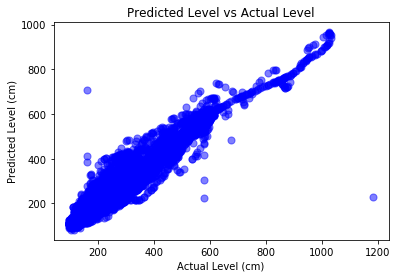

In [17]:
plt.scatter(y_test, y_prediction, c = 'b',  s = 50, alpha = 0.5)

plt.xlabel("Actual Level (cm)")
plt.ylabel("Predicted Level (cm)")
plt.title("Predicted Level vs Actual Level")

plt.show()

O erro percentual absoluto médio obtido neste modelo foi de apenas 8.4%.

In [21]:
MAPE = np.mean(np.abs((y_test - y_prediction) / y_test)) * 100
print("%.2f" %MAPE+"%")

8.84%
